In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA
from tubulate import tabulate
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
loan = pd.read_csv("LoanApprovalPrediction.csv")
loan = loan.drop_duplicates()
loan.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [ ]:
loan.describe(include=object)

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,598,598,598,598,598,598,598
unique,598,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,487,388,465,488,225,411


In [ ]:
loan.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

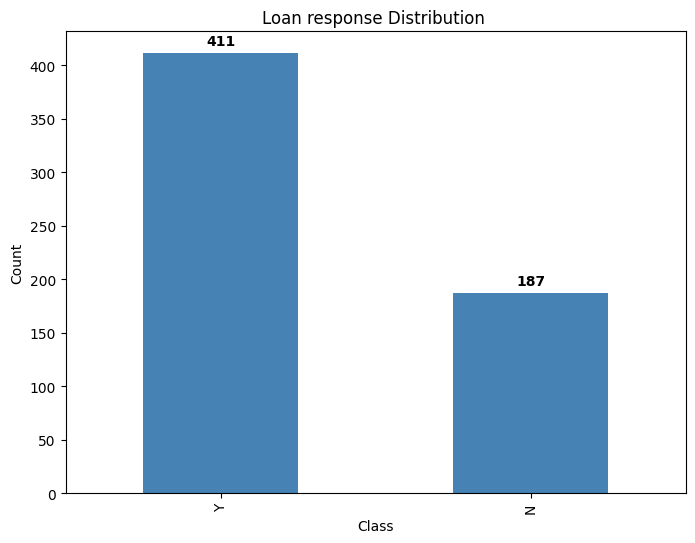

In [ ]:
class_distribution = loan['Loan_Status'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
ax = class_distribution.plot(kind='bar', color='steelblue')
plt.xlabel('Class')
plt.ylabel('Count')

plt.title('Loan response Distribution ')
ax.grid(False)
# Add value labels on top of each bar
for i, count in enumerate(class_distribution):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
categorical= ['Gender', 'Married',  'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents','Loan_Amount_Term']

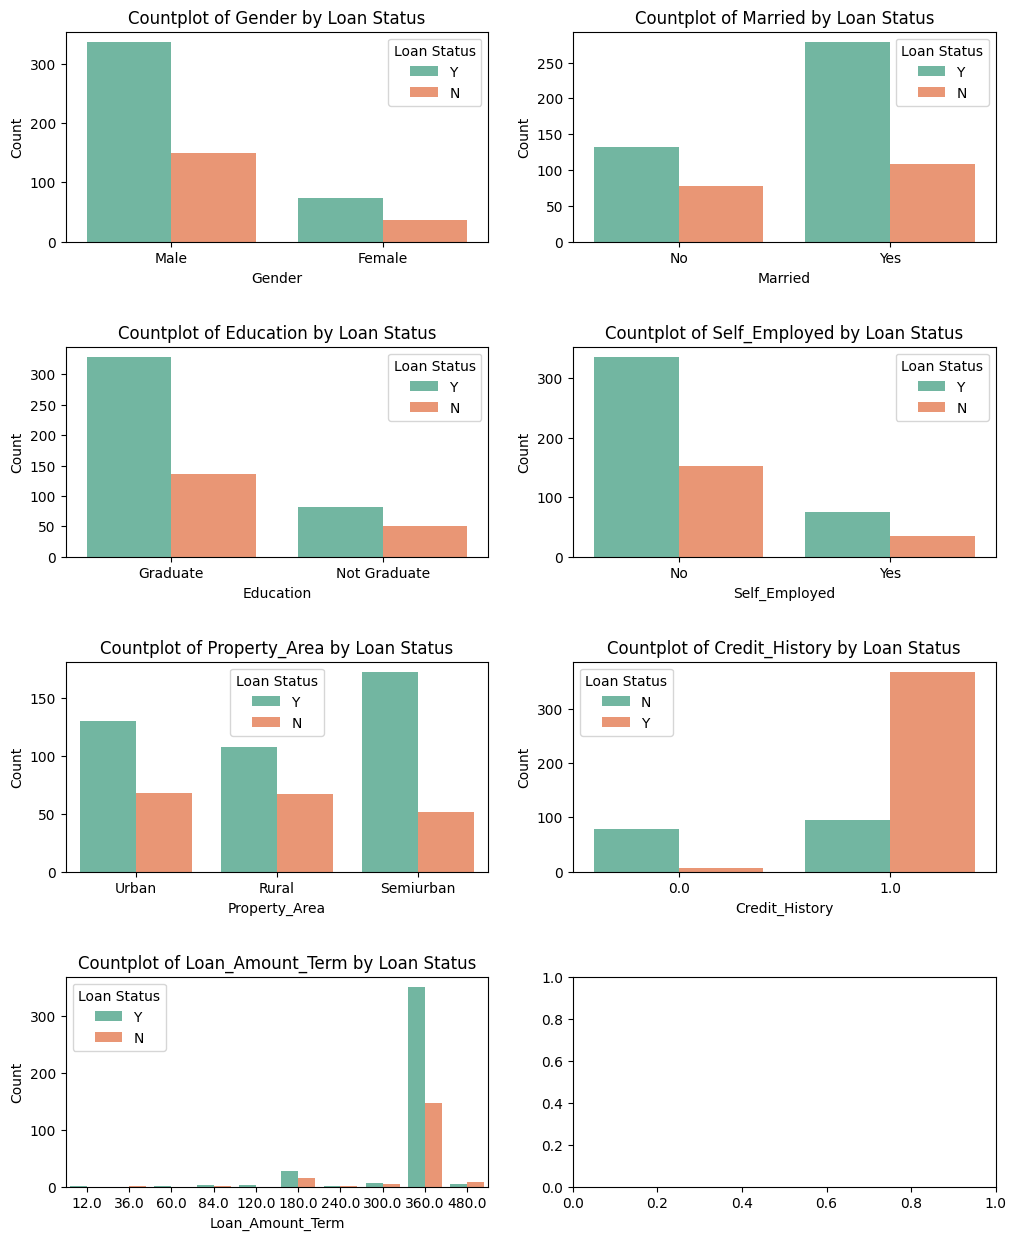

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Plot each categorical column
for idx, cat_col in enumerate(categorical):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=loan, hue='Loan_Status', ax=axes[row, col],palette='Set2')
    axes[row, col].set_title(f'Countplot of {cat_col} by Loan Status')
    axes[row, col].set_xlabel(cat_col)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Loan Status')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plots
plt.show()

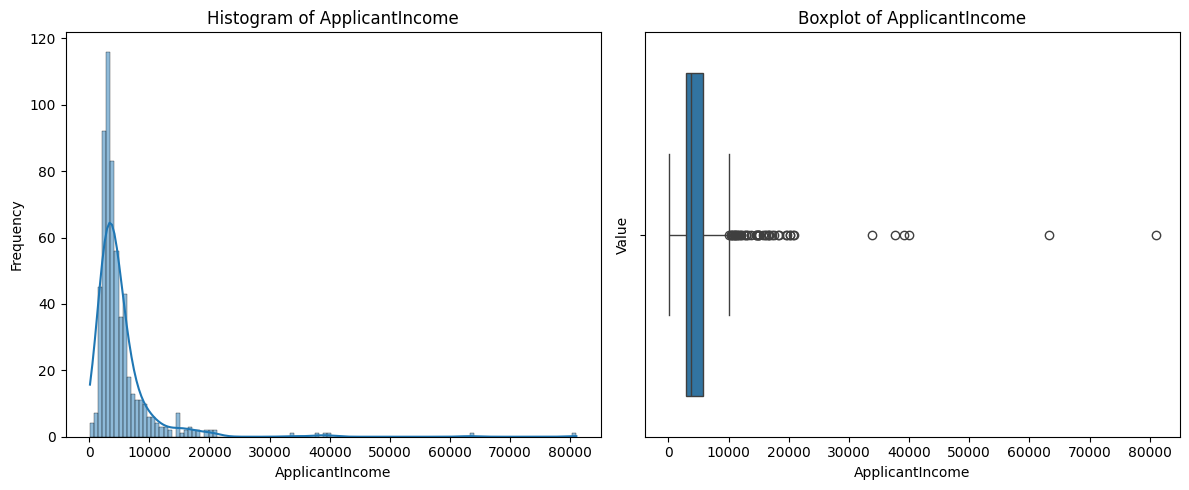

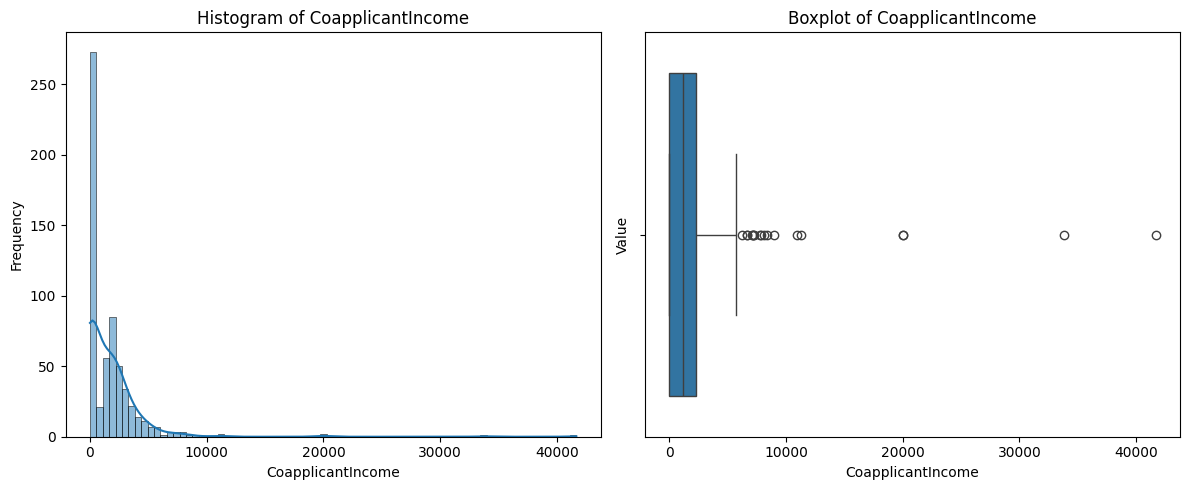

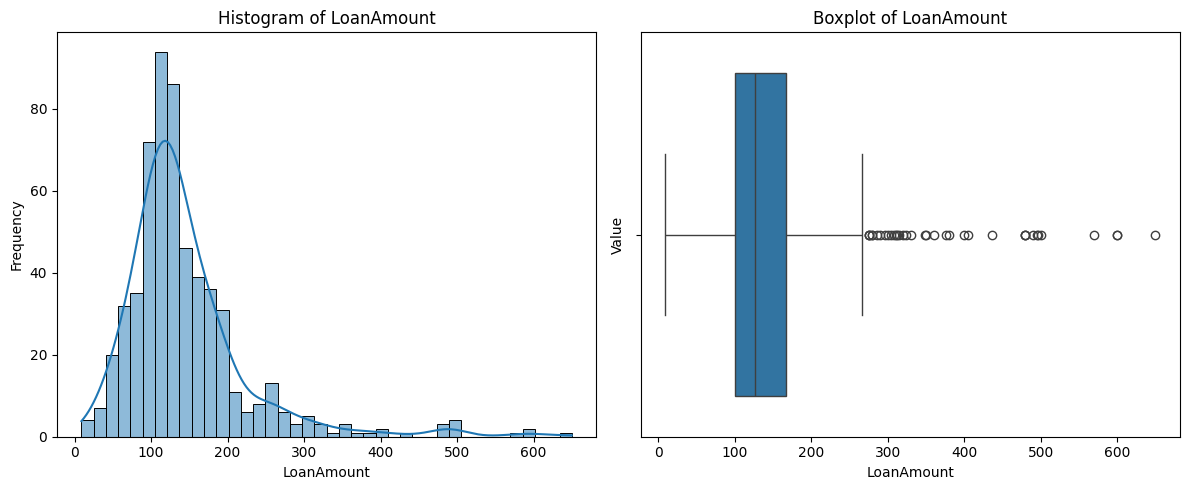

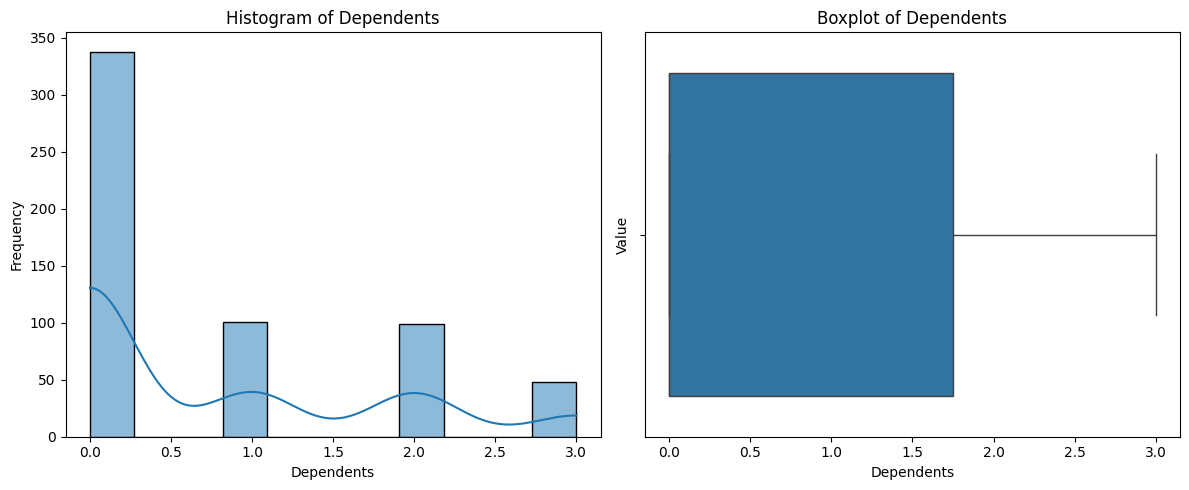

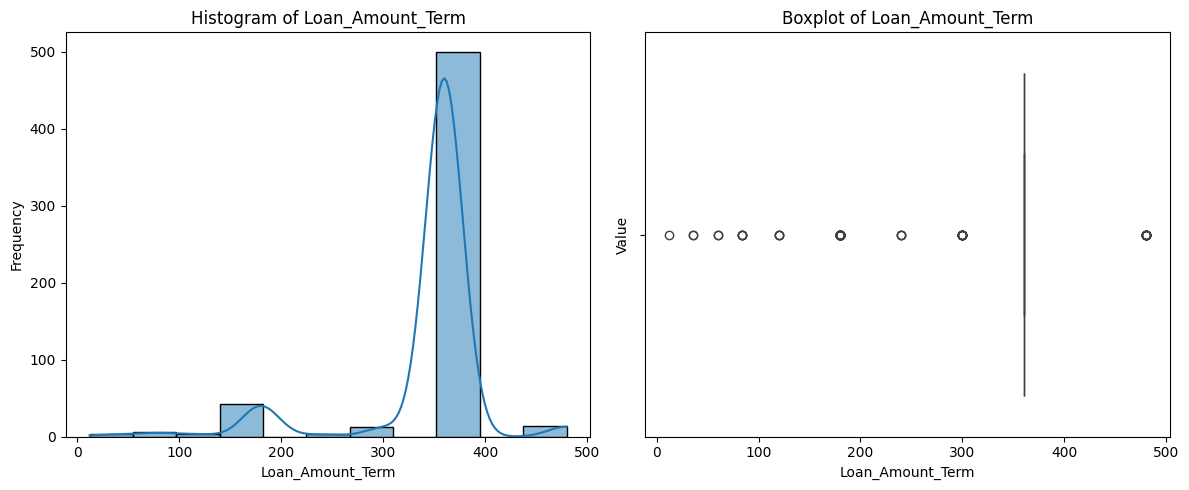

In [ ]:
for col in numerical:
    # Create a figure with two subplots (histogram and boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(loan[col], ax=axes[0], kde=True)  # Use sns.histplot for histogram with KDE
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=loan[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Value')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()

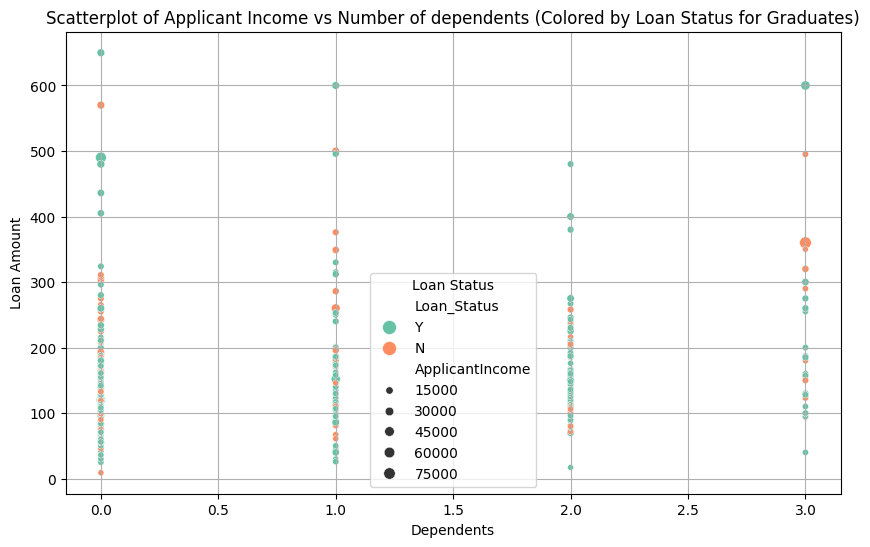

In [ ]:
graduate_df = loan[loan['Education'] == 'Graduate']

# Create scatterplot with color-coded Loan_Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dependents', y='LoanAmount', size='ApplicantIncome',hue='Loan_Status', data=graduate_df, palette='Set2', s=100)
plt.title('Scatterplot of Applicant Income vs Number of dependents (Colored by Loan Status for Graduates)')
plt.xlabel('Dependents')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()

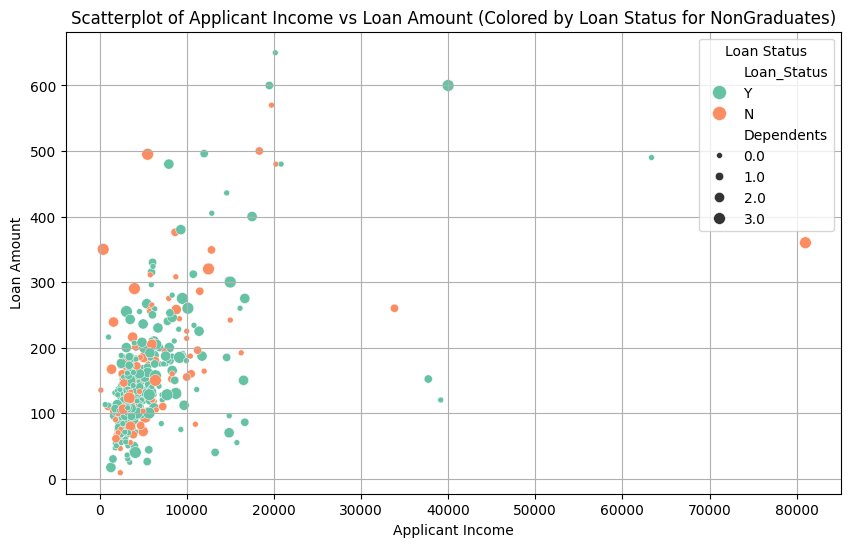

In [ ]:
graduate_d = loan[loan['Education'] == 'Non-Graduate']

# Create scatterplot with color-coded Loan_Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', size='Dependents',hue='Loan_Status', data=graduate_df, palette='Set2', s=100)
plt.title('Scatterplot of Applicant Income vs Loan Amount (Colored by Loan Status for NonGraduates)')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()

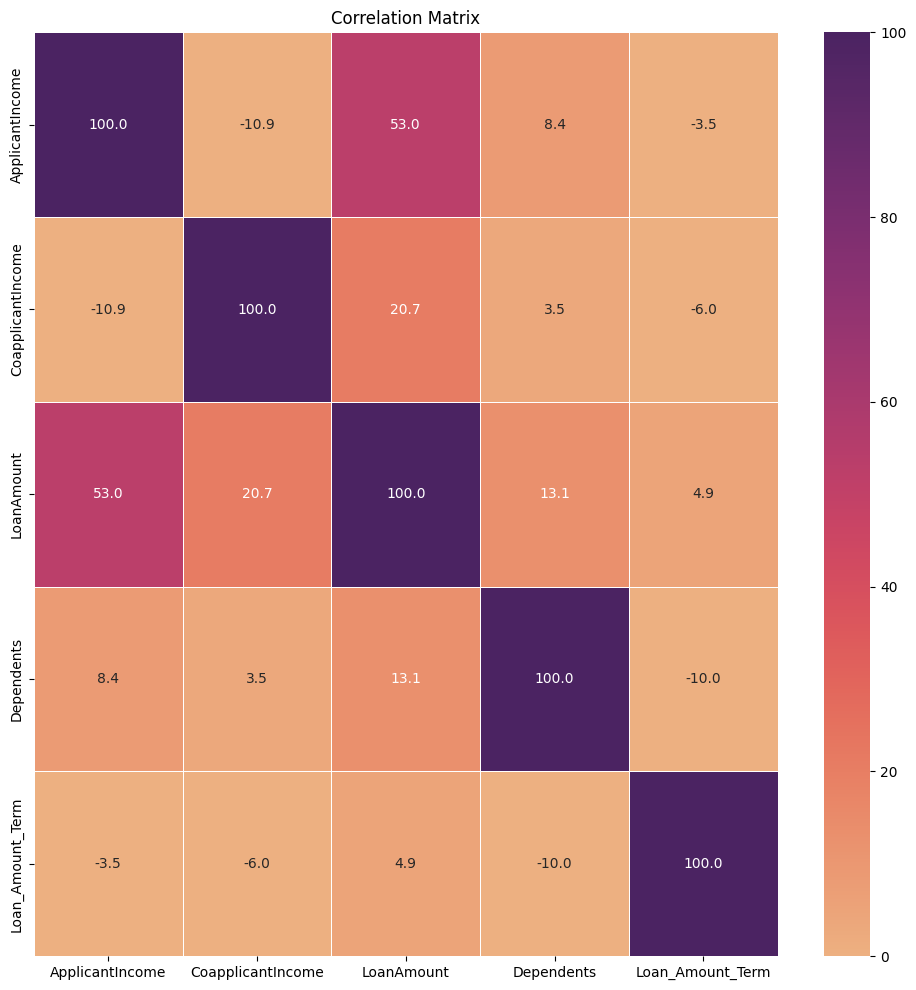

In [ ]:
corr_matrix = loan[numerical].corr()*100

# Plotting the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.title('Correlation Matrix')
plt.show()

In [ ]:
loan[numerical].skew().sort_values()

Loan_Amount_Term    -2.397439
Dependents           0.986228
LoanAmount           2.532073
ApplicantIncome      6.954134
CoapplicantIncome    7.470981
dtype: float64

In [ ]:
loan = loan.drop(columns=['Loan_ID'])
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode()[0])
loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].mean())
loan["Credit_History"] = loan["Credit_History"].fillna(loan["Credit_History"].mode()[0])
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode()[0])
loan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan.ApplicantIncome = np.sqrt(loan.ApplicantIncome)
loan.CoapplicantIncome = np.sqrt(loan.CoapplicantIncome)
loan.LoanAmount = np.sqrt(loan.LoanAmount)

In [ ]:
loan = pd.get_dummies(loan, drop_first=True)
loan.head()
newColunmsNames = {'Gender_Male': 'Gender', 
                   'Married_Yes': 'Married', 
                   'Education_NotGraduate': 'Education', 
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}

#Assigning new columns names
loan.rename(columns=newColunmsNames, inplace=True)

In [ ]:
X = loan.drop(['Loan_Status'], axis=1)

y = loan['Loan_Status']

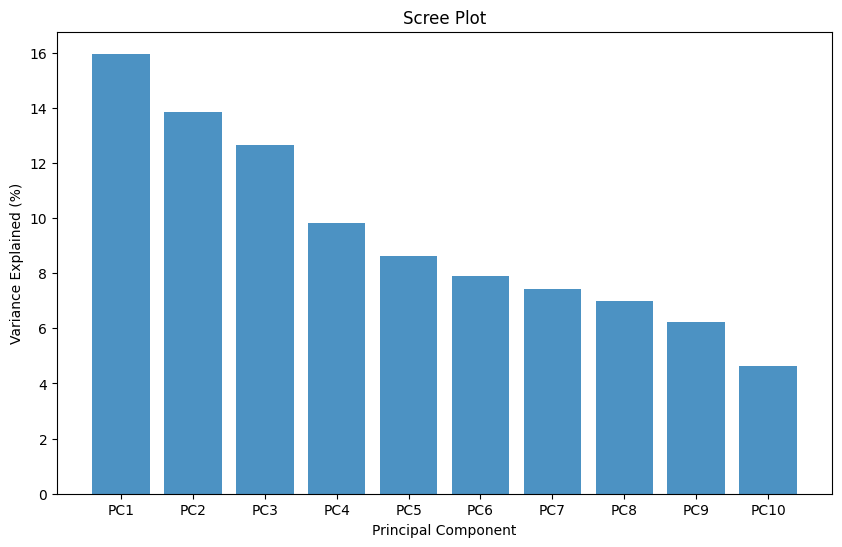

Top features for Principal Component 1:
+-----------------+
|  Top Features   |
+-----------------+
|   LoanAmount    |
|     Married     |
|     Gender      |
|   Dependents    |
| ApplicantIncome |
+-----------------+

Top features for Principal Component 2:
+-------------------------+
|      Top Features       |
+-------------------------+
|   Property_Area_Urban   |
| Property_Area_Semiurban |
|     ApplicantIncome     |
|       LoanAmount        |
|         Gender          |
+-------------------------+

Top features for Principal Component 3:
+-------------------------+
|      Top Features       |
+-------------------------+
|   Property_Area_Urban   |
| Property_Area_Semiurban |
|     ApplicantIncome     |
|    CoapplicantIncome    |
|         Married         |
+-------------------------+

Top features for Principal Component 4:
+------------------------+
|      Top Features      |
+------------------------+
|   CoapplicantIncome    |
| Education_Not Graduate |
|    Loan_Amount_T

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=10, random_state=42)  

pca.fit(scaled_data)

# Transform the data to principal components
pca_components = pca.transform(scaled_data)

# Convert PCA components to DataFrame (for visualization or further analysis)
pca_df = pd.DataFrame(data=pca_components, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Plot explained variance ratio in a scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_ * 100, align='center', alpha=0.8)
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1), [f"PC{i}" for i in range(1, len(pca.explained_variance_ratio_) + 1)])
plt.ylabel('Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Print top features for each principal component
components_df = pd.DataFrame(pca.components_, columns=X.columns)

for i, component in enumerate(components_df.values):
    print(f"Top features for Principal Component {i + 1}:")
    top_features = X.columns[np.abs(component).argsort()[::-1][:5]]  # Top 5 features
    table = tabulate(pd.DataFrame(top_features), headers=['Top Features'], showindex=False, tablefmt='pretty')
    print(table)
    print()
    #print(top_features)
    #print()

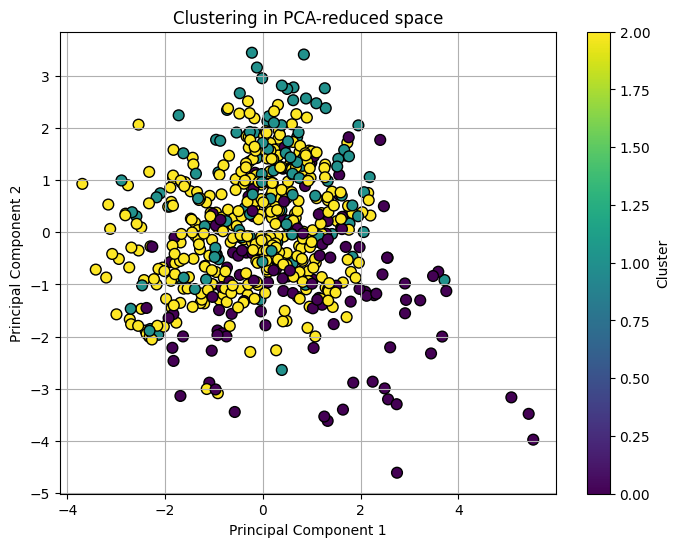

In [ ]:
#Clustering Analysis
X_pca = pca.fit_transform(scaled_data)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering in PCA-reduced space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

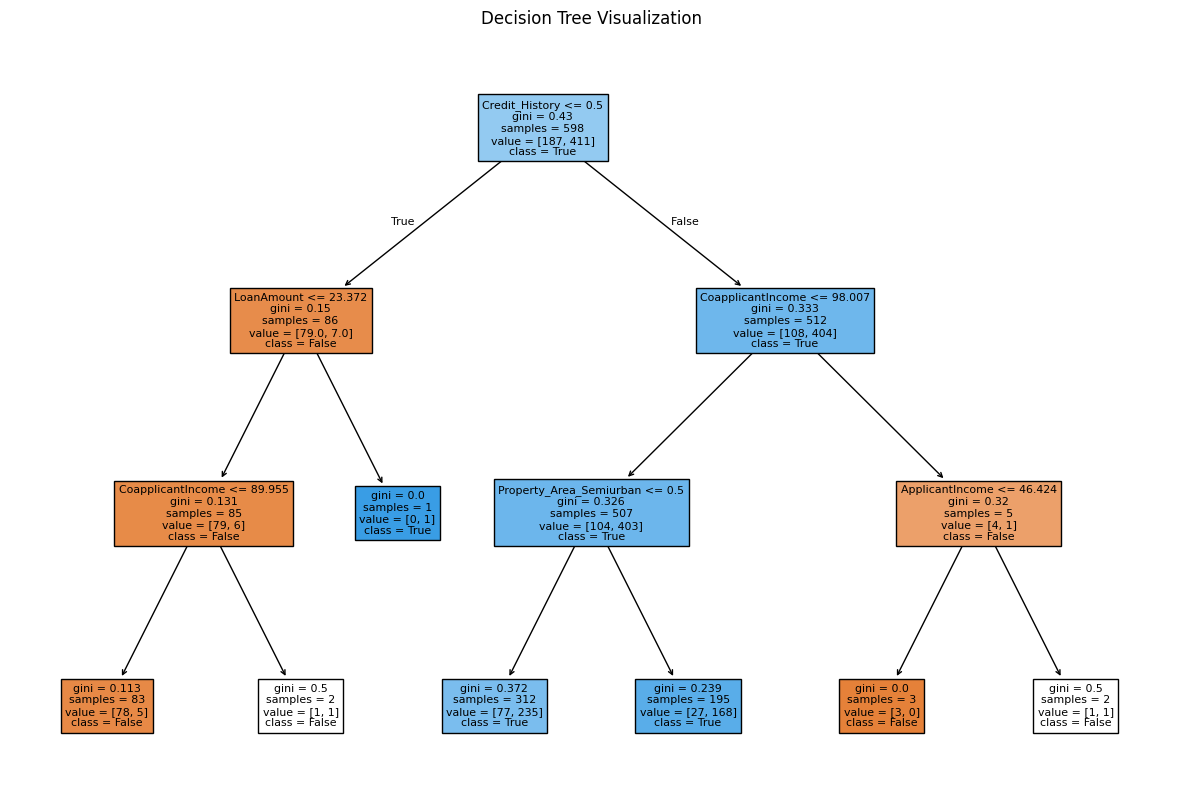

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(model, 
          feature_names=X.columns,  
          class_names=[str(cls) for cls in model.classes_],
          filled=True)

plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
##Training and testing data
loan_encode= pd.get_dummies(loan, drop_first=True)
loan_encode.head(5)
X=loan_encode.drop(['Loan_Status'],axis=1)

y = loan_encode['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [ ]:
training_accuracy = []
test_accuracy = []
training_f1 = []
test_f1 = []
tree_depths = []
max_val_accuracy = 0
best_depth = 0
for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)
    y_test_pred = tree_clf.predict(X_test)

    training_acc = metrics.accuracy_score(y_train,y_training_pred)
    train_f1 = metrics.f1_score(y_train,y_training_pred)
    test_acc = metrics.accuracy_score(y_test,y_test_pred)
    test_f1_score = metrics.f1_score(y_test,y_test_pred)
    
    training_accuracy.append(training_acc)
    test_accuracy.append(test_acc)
    training_f1.append(train_f1)
    test_f1.append(test_f1_score)
    tree_depths.append(depth)
    
    # Track maximum validation accuracy and corresponding depth
    if test_acc > max_val_accuracy:
        max_val_accuracy = test_acc
        best_depth = depth

# Create a DataFrame from the collected metrics
Tuning_Max_depth = {
    "Training Accuracy": training_accuracy,
    "Test Accuracy Accuracy": test_accuracy,
    "Training F1": training_f1,
    "test F1": test_f1,
    "Max_Depth": tree_depths
}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Print the results
print(f"Maximum Validation Accuracy: {max_val_accuracy} at depth: {best_depth}")

# Optionally, you can print the entire DataFrame
print(Tuning_Max_depth_df)


Maximum Validation Accuracy: 0.825 at depth: 3
    Training Accuracy  Test Accuracy Accuracy  Training F1   test F1  \
0            0.807531                0.808333     0.875676  0.874317   
1            0.809623                0.808333     0.877193  0.874317   
2            0.817992                0.825000     0.881633  0.883978   
3            0.822176                0.808333     0.884668  0.874317   
4            0.832636                0.808333     0.890411  0.874317   
5            0.847280                0.783333     0.899310  0.855556   
6            0.857741                0.800000     0.905556  0.868132   
7            0.870293                0.791667     0.913165  0.861878   
8            0.887029                0.808333     0.923295  0.872928   
9            0.907950                0.783333     0.936599  0.853933   
10           0.920502                0.800000     0.945402  0.865169   
11           0.943515                0.766667     0.960000  0.839080   
12           0.96

LogisticRegression_StratifiedKFold_5 Best Score: 0.8077
LogisticRegression_StratifiedKFold_5 Best Parameters: {'logistic__C': 10}

LogisticRegression_KFold_5 Best Score: 0.8061
LogisticRegression_KFold_5 Best Parameters: {'logistic__C': 0.1}

SVC_StratifiedKFold_5 Best Score: 0.8077
SVC_StratifiedKFold_5 Best Parameters: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

SVC_KFold_5 Best Score: 0.8078
SVC_KFold_5 Best Parameters: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

RandomForestClassifier_StratifiedKFold_5 Best Score: 0.8111
RandomForestClassifier_StratifiedKFold_5 Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}

RandomForestClassifier_KFold_5 Best Score: 0.8078
RandomForestClassifier_KFold_5 Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

LogisticRegression Test Accur

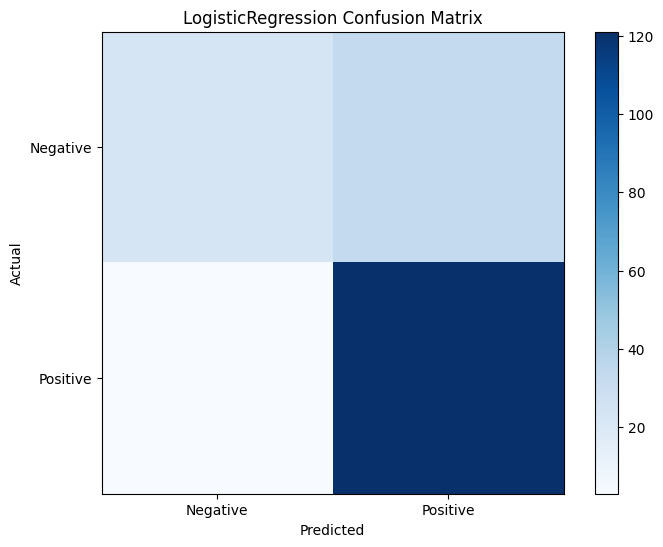

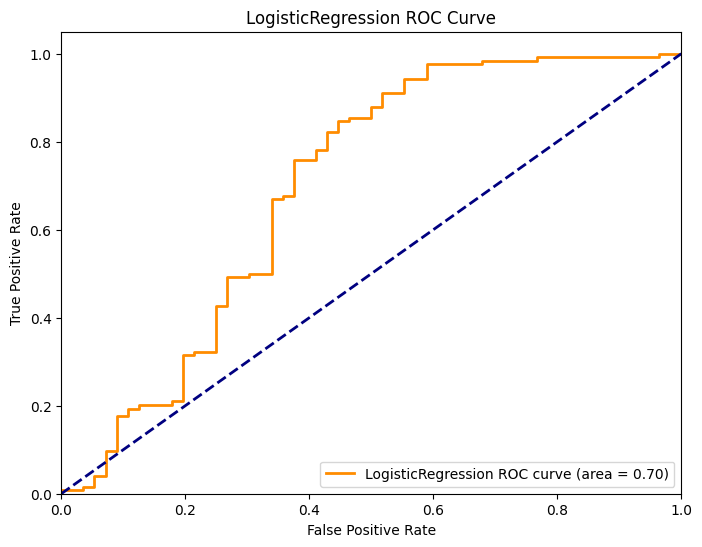

SVC Test Accuracy: 0.7944
Model: SVC
Confusion Matrix:
[[ 22  34]
 [  3 121]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.39      0.54        56
        True       0.78      0.98      0.87       124

    accuracy                           0.79       180
   macro avg       0.83      0.68      0.71       180
weighted avg       0.81      0.79      0.77       180

Accuracy: 0.7944444444444444


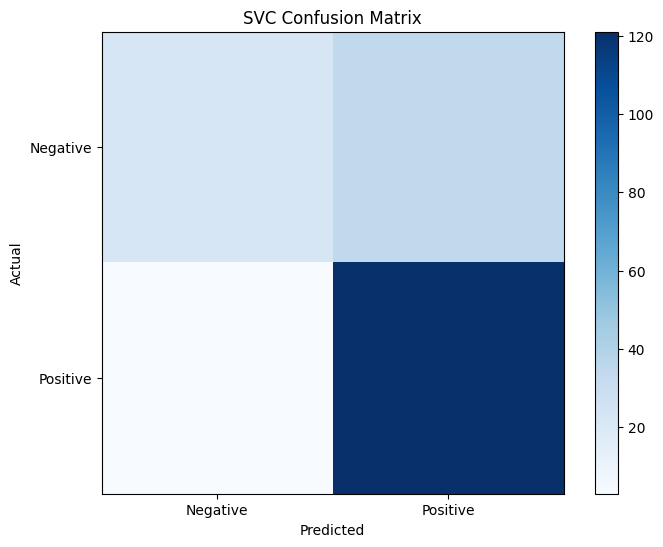

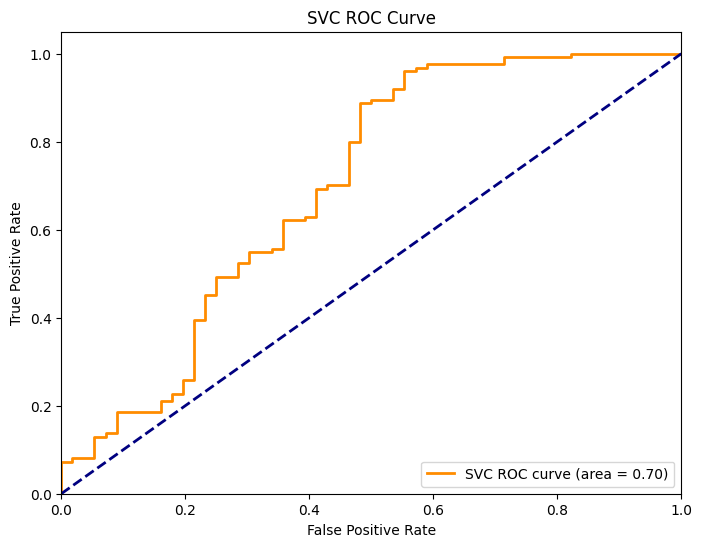

RandomForestClassifier Test Accuracy: 0.7944
Model: RandomForestClassifier
Confusion Matrix:
[[ 23  33]
 [  4 120]]
Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.41      0.55        56
        True       0.78      0.97      0.87       124

    accuracy                           0.79       180
   macro avg       0.82      0.69      0.71       180
weighted avg       0.81      0.79      0.77       180

Accuracy: 0.7944444444444444


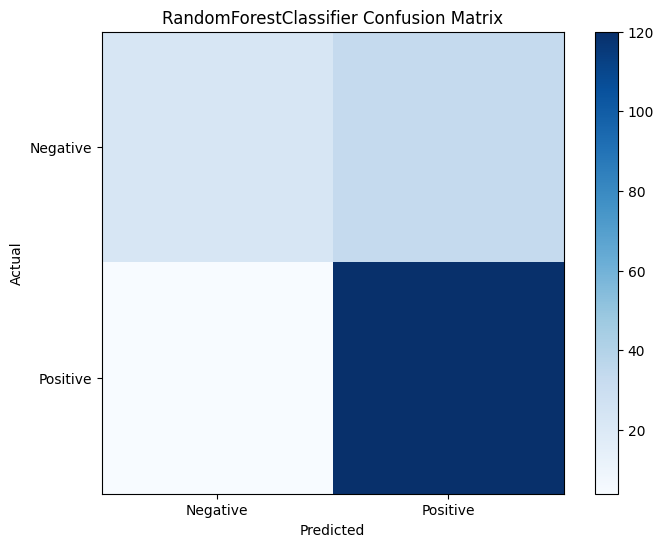

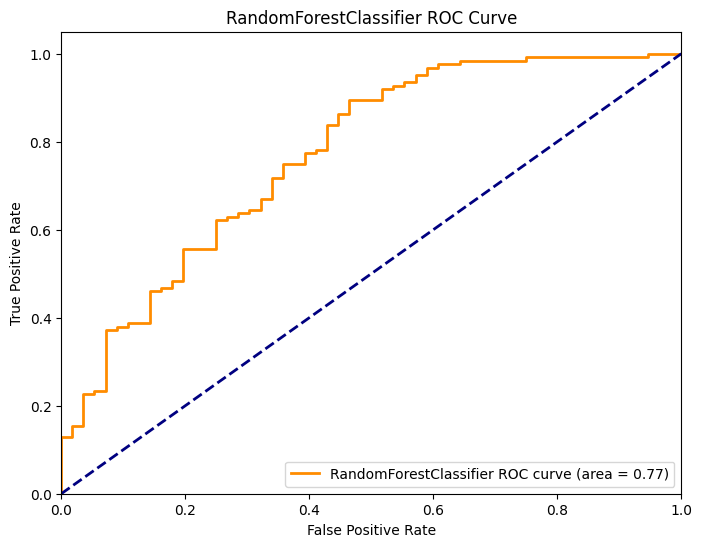

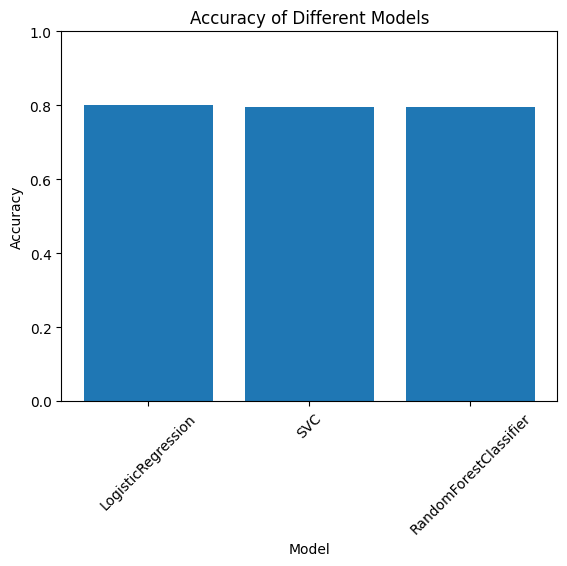

In [ ]:
# Define pipelines for each classifier
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define hyperparameters for grid search
params = {
    'LogisticRegression': {
        'logistic__C': [0.1, 1, 10, 100]
    },
    'SVC': {
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__degree': [1, 2, 3, 4],
        'svc__C': [1, 10, 100],
        'svc__gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'rf__n_estimators': [10, 50, 100],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4]
    }
}

# Define different KFold strategies for cross-validation
kfold_strategies = {
    'StratifiedKFold_5': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'KFold_5': KFold(n_splits=5, shuffle=True, random_state=42)
}

# Perform grid search with cross-validation
results = {}
for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    for kfold_name, kfold_strategy in kfold_strategies.items():
        grid_search = GridSearchCV(clf_pipeline, param_grid=params[clf_name], cv=kfold_strategy)
        grid_search.fit(X, y)
        
        results[f'{clf_name}_{kfold_name}'] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        }

# Print results
for result_key, result_value in results.items():
    print(f"{result_key} Best Score: {result_value['best_score']:.4f}")
    print(f"{result_key} Best Parameters: {result_value['best_params']}")
    print()
results = []
# Optionally, evaluate best models on test set
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    best_clf = GridSearchCV(clf_pipeline, param_grid=params[clf_name], cv=kfold_strategies['StratifiedKFold_5'])
    best_clf.fit(X_train, y_train)
    
    y_pred = best_clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results.append(accuracy)
    print(f"{clf_name} Test Accuracy: {accuracy:.4f}")
    print(f"Model: {clf_name}")
    print(f"Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{metrics.classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy}")
    

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{clf_name} Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.grid(False)
    plt.show()

    # Plot ROC Curve
    y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{clf_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot the results
plt.plot(['LogisticRegression', 'SVC', 'RandomForestClassifier'], results,marker='o', linestyle='', color='b', markersize=10)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.show()


LogisticRegression_StratifiedKFold_5 Best Score: 0.8060
LogisticRegression_StratifiedKFold_5 Best Parameters: {'logistic__C': 0.1}

SVC_StratifiedKFold_5 Best Score: 0.8077
SVC_StratifiedKFold_5 Best Parameters: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

RandomForestClassifier_StratifiedKFold_5 Best Score: 0.8110
RandomForestClassifier_StratifiedKFold_5 Best Parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}

LogisticRegression Test Accuracy: 0.8083
Model: LogisticRegression
Confusion Matrix:
[[17 21]
 [ 2 80]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.45      0.60        38
        True       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120

Accuracy: 0.8083333333333333


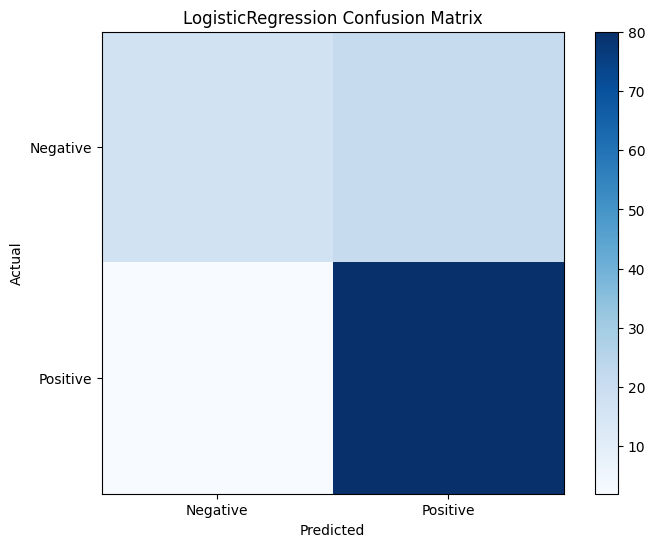

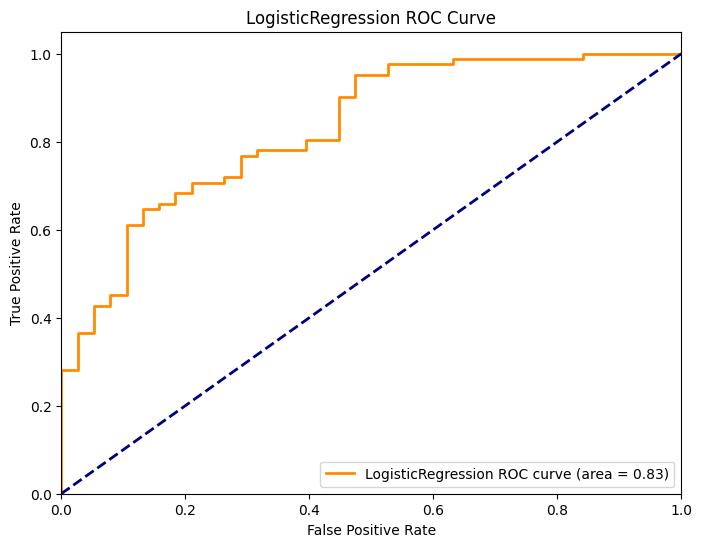

SVC Test Accuracy: 0.8083
Model: SVC
Confusion Matrix:
[[17 21]
 [ 2 80]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.45      0.60        38
        True       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120

Accuracy: 0.8083333333333333


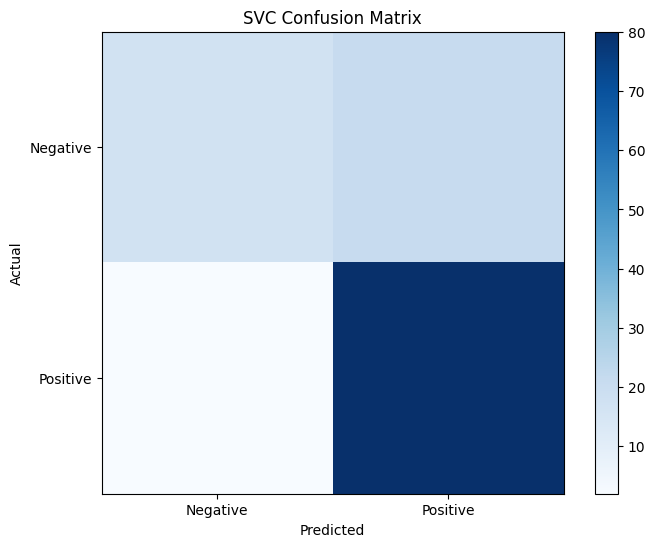

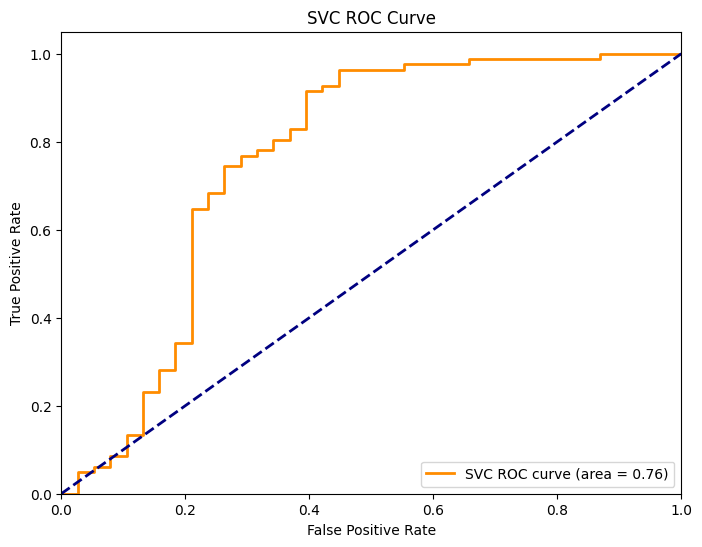

RandomForestClassifier Test Accuracy: 0.8083
Model: RandomForestClassifier
Confusion Matrix:
[[17 21]
 [ 2 80]]
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.45      0.60        38
        True       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120

Accuracy: 0.8083333333333333


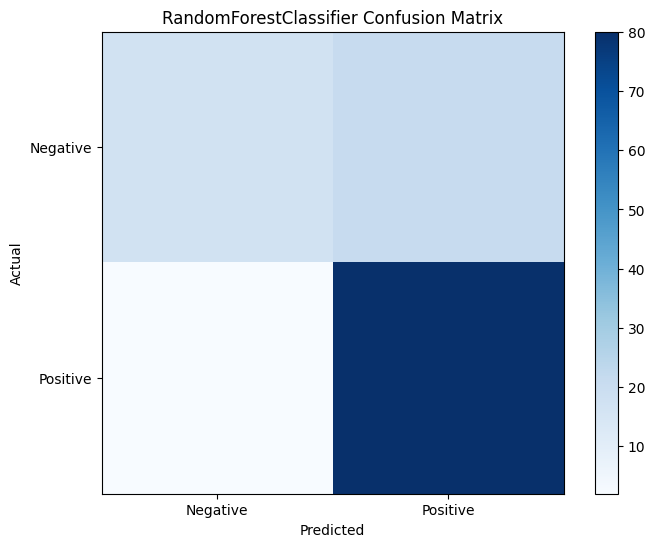

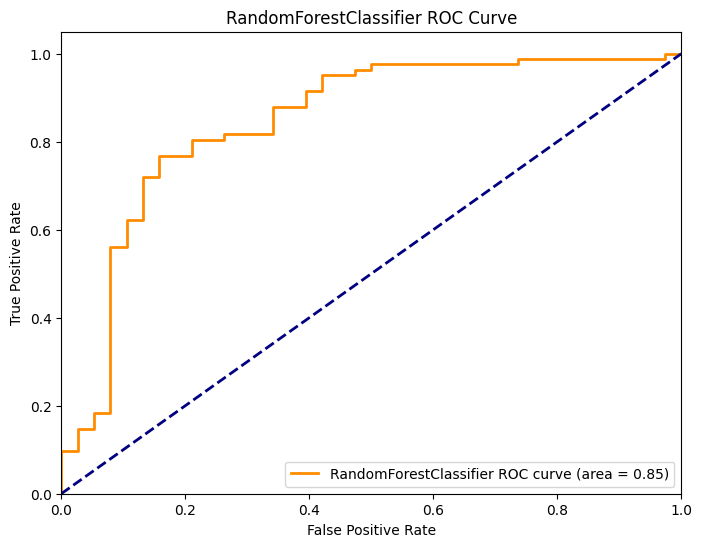

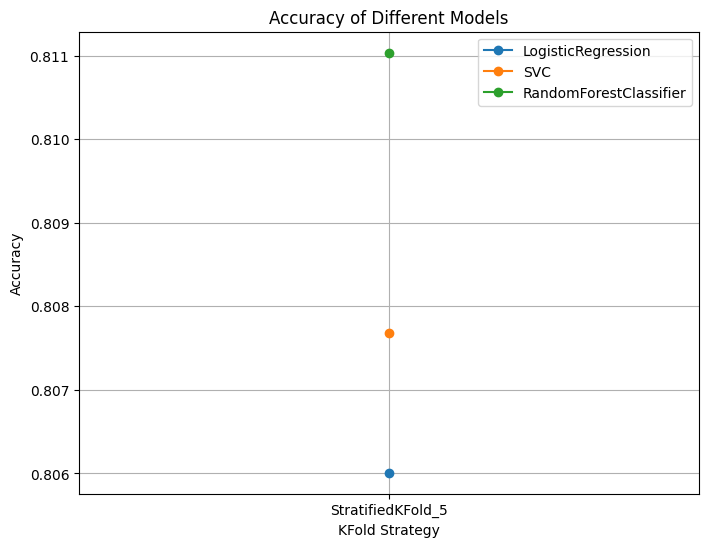

In [151]:
# Define pipelines for each classifier
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define hyperparameters for grid search
params = {
    'LogisticRegression': {
        'logistic__C': [0.1, 1, 10, 100]
    },
    'SVC': {
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__degree': [1, 2, 3, 4],
        'svc__C': [1, 10, 100],
        'svc__gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'rf__n_estimators': [10, 50, 100],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4]
    }
}

# Define different KFold strategies for cross-validation
kfold_strategies = {
    'StratifiedKFold_5': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    # Add more if needed
}

# Perform grid search with cross-validation
results = {}
for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    for kfold_name, kfold_strategy in kfold_strategies.items():
        grid_search = GridSearchCV(clf_pipeline, param_grid=params[clf_name], cv=kfold_strategy)
        grid_search.fit(X, y)
        
        results[f'{clf_name}_{kfold_name}'] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'best_estimator': grid_search.best_estimator_
        }

# Print results
for result_key, result_value in results.items():
    print(f"{result_key} Best Score: {result_value['best_score']:.4f}")
    print(f"{result_key} Best Parameters: {result_value['best_params']}")
    print()

# Optionally, evaluate best models on test set
for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    best_clf = results[f'{clf_name}_StratifiedKFold_5']['best_estimator']
    best_clf.fit(X_train, y_train)
    
    y_pred = best_clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"{clf_name} Test Accuracy: {accuracy:.4f}")
    print(f"Model: {clf_name}")
    print(f"Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{metrics.classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{clf_name} Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.grid(False)
    plt.show()

    # Plot ROC Curve
    if hasattr(best_clf, 'predict_proba'):
        y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = best_clf.decision_function(X_test)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{clf_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot the results using plt.plot with markers
models = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
plt.figure(figsize=(8, 6))
for model in models:
    accuracy_values = [results[f'{model}_StratifiedKFold_5']['best_score'] for _ in range(len(kfold_strategies))]
    plt.plot(list(kfold_strategies.keys()), accuracy_values, marker='o', label=model)

plt.xlabel('KFold Strategy')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()


LogisticRegression_StratifiedKFold_5 Best Score: 0.7823
LogisticRegression_StratifiedKFold_5 Best Parameters: {'logistic__C': 0.1}

SVC_StratifiedKFold_5 Best Score: 0.8101
SVC_StratifiedKFold_5 Best Parameters: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

RandomForestClassifier_StratifiedKFold_5 Best Score: 0.8433
RandomForestClassifier_StratifiedKFold_5 Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

LogisticRegression Test Accuracy: 0.7667
Model: LogisticRegression
Confusion Matrix:
[[ 27  29]
 [ 13 111]]
Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.48      0.56        56
        True       0.79      0.90      0.84       124

    accuracy                           0.77       180
   macro avg       0.73      0.69      0.70       180
weighted avg       0.76      0.77      0.75       180

Accuracy: 0.7666666666666667


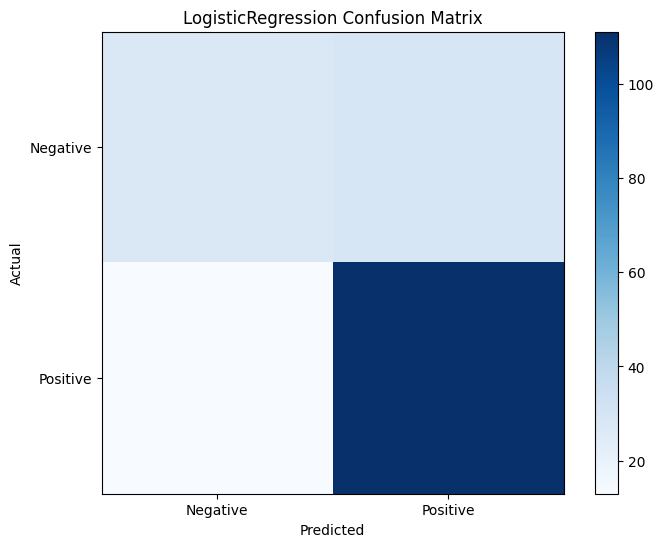

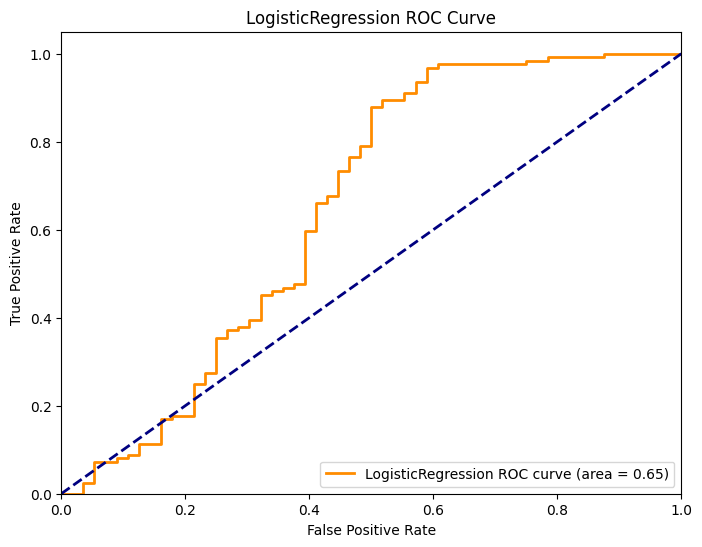

SVC Test Accuracy: 0.7889
Model: SVC
Confusion Matrix:
[[ 25  31]
 [  7 117]]
Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.45      0.57        56
        True       0.79      0.94      0.86       124

    accuracy                           0.79       180
   macro avg       0.79      0.69      0.71       180
weighted avg       0.79      0.79      0.77       180

Accuracy: 0.7888888888888889


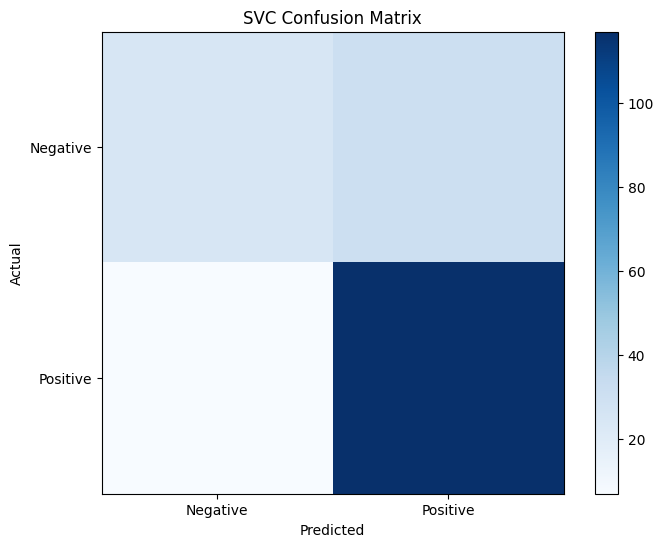

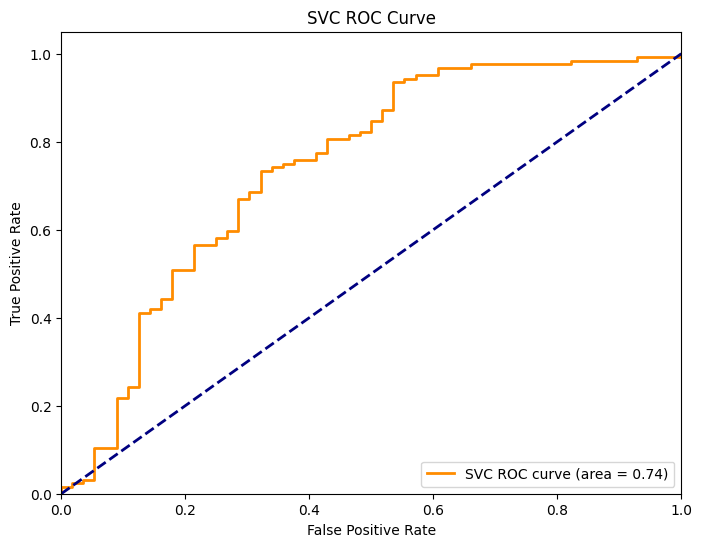

RandomForestClassifier Test Accuracy: 0.7778
Model: RandomForestClassifier
Confusion Matrix:
[[ 27  29]
 [ 11 113]]
Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.48      0.57        56
        True       0.80      0.91      0.85       124

    accuracy                           0.78       180
   macro avg       0.75      0.70      0.71       180
weighted avg       0.77      0.78      0.76       180

Accuracy: 0.7777777777777778


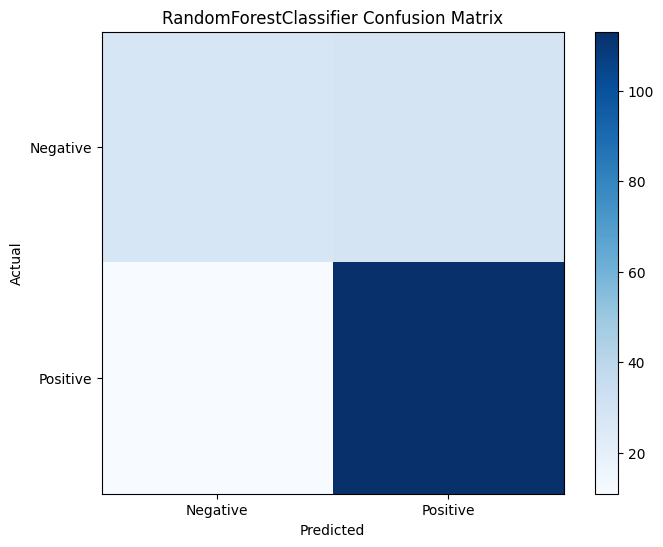

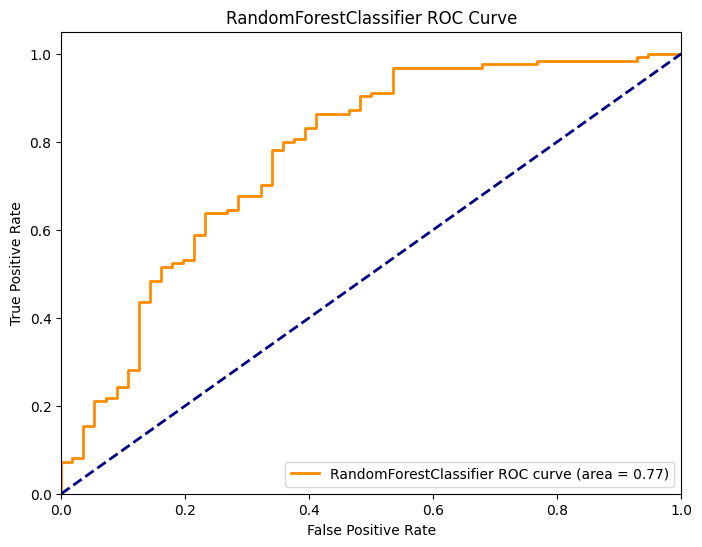

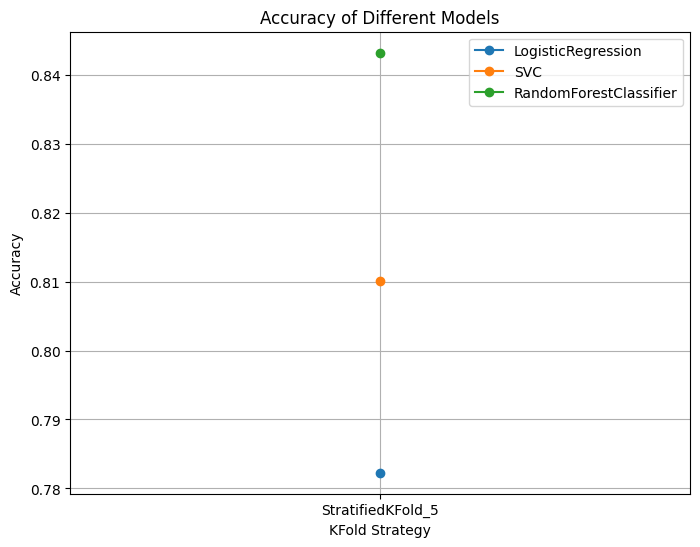

In [152]:
##Performing smote analysis

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assume X and y are your data and labels respectively

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define pipelines for each classifier
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

# Define hyperparameters for grid search
params = {
    'LogisticRegression': {
        'logistic__C': [0.1, 1, 10, 100]
    },
    'SVC': {
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svc__degree': [1, 2, 3, 4],
        'svc__C': [1, 10, 100],
        'svc__gamma': ['scale', 'auto']
    },
    'RandomForestClassifier': {
        'rf__n_estimators': [10, 50, 100],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4]
    }
}

# Define different KFold strategies for cross-validation
kfold_strategies = {
    'StratifiedKFold_5': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    # Add more if needed
}

# Perform grid search with cross-validation
results = {}
for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    for kfold_name, kfold_strategy in kfold_strategies.items():
        grid_search = GridSearchCV(clf_pipeline, param_grid=params[clf_name], cv=kfold_strategy)
        grid_search.fit(X_train_smote, y_train_smote)  # Use SMOTE training data here
        
        results[f'{clf_name}_{kfold_name}'] = {
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
            'best_estimator': grid_search.best_estimator_
        }

# Print results
for result_key, result_value in results.items():
    print(f"{result_key} Best Score: {result_value['best_score']:.4f}")
    print(f"{result_key} Best Parameters: {result_value['best_params']}")
    print()

# Optionally, evaluate best models on test set
for clf_name, clf_pipeline in [('LogisticRegression', logistic_pipeline),
                               ('SVC', svc_pipeline),
                               ('RandomForestClassifier', rf_pipeline)]:
    best_clf = results[f'{clf_name}_StratifiedKFold_5']['best_estimator']
    best_clf.fit(X_train_smote, y_train_smote)  # Use SMOTE training data here
    
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Test Accuracy: {accuracy:.4f}")
    print(f"Model: {clf_name}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Accuracy: {accuracy}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{clf_name} Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.grid(False)
    plt.show()

    # Plot ROC Curve
    if hasattr(best_clf, 'predict_proba'):
        y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = best_clf.decision_function(X_test)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{clf_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{clf_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot the results using plt.plot with markers
models = ['LogisticRegression', 'SVC', 'RandomForestClassifier']
plt.figure(figsize=(8, 6))
for model in models:
    accuracy_values = [results[f'{model}_StratifiedKFold_5']['best_score'] for _ in range(len(kfold_strategies))]
    plt.plot(list(kfold_strategies.keys()), accuracy_values, marker='o', label=model)

plt.xlabel('KFold Strategy')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [160]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
param_grid = {
    'max_depth': range(1, 20),
    
    
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with best model: {test_accuracy:.3f}")

Fitting 5 folds for each of 38 candidates, totalling 190 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 1}
Best cross-validation accuracy: 0.807
Test accuracy with best model: 0.808


In [ ]:
## Feature importance based on decision tree model

Accuracy: 0.8250


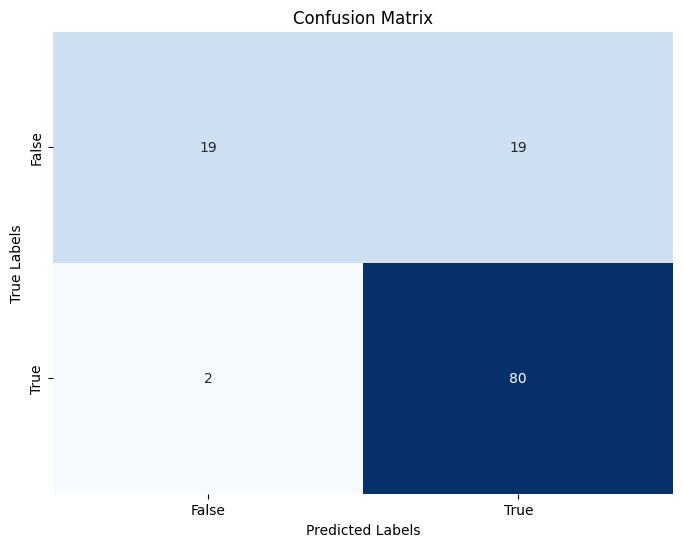

In [164]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Top 10 Important Features:
                  Feature  Importance
0          Credit_History    0.858111
1       CoapplicantIncome    0.082172
2              LoanAmount    0.059718
3              Dependents    0.000000
4         ApplicantIncome    0.000000
5        Loan_Amount_Term    0.000000
6                  Gender    0.000000
7                 Married    0.000000
8  Education_Not Graduate    0.000000
9           Self_Employed    0.000000


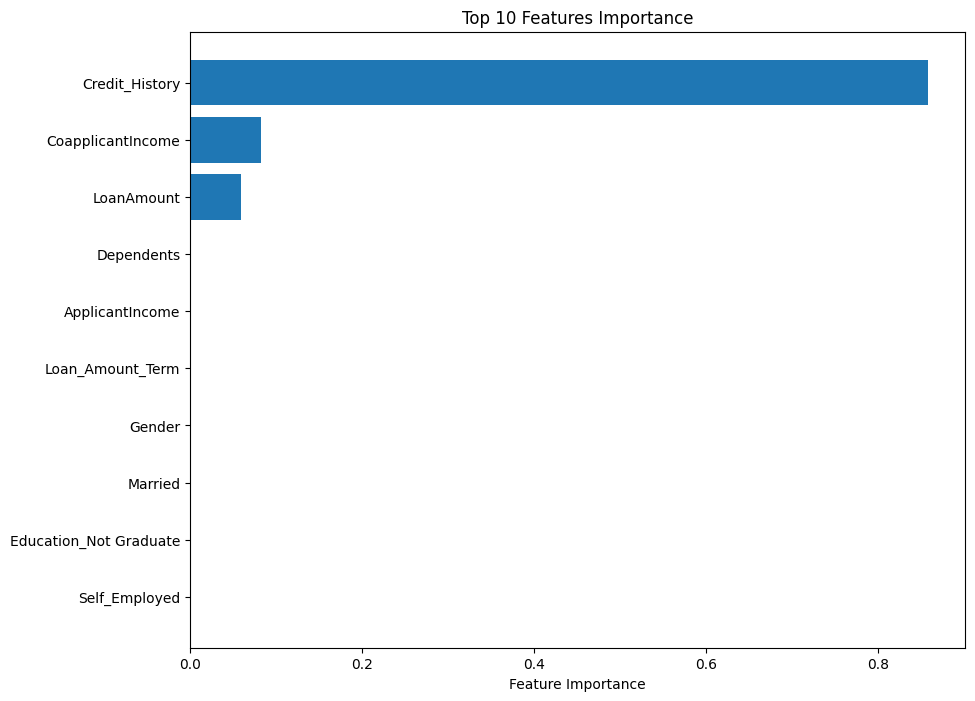

In [171]:
# Assuming you have already computed feature importance

importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Print or display the top features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], align='center')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()
